# 1 Sample - Fe-Mg equilibrium in ol-hosted MIs
- This notebook shows how to assess Fe-Mg equilibrium between olivines and melt inclusions, and between melt inclusions and co-erupted matrix glasses to let you assess Fe-Mg diffusion and post-entrapment crystallization
- In this example, we have just 1 sample in our spreadsheet, so we dont have to segment by sample name
- You can download the spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Melt_Inclusion_FeMg_Equilibrium/2018_MIs_Glasses.xlsx

In [1]:
## Install Thermobar if you haven't already (remove the # and press run!)

#!pip install Thermobar

In [2]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Loading a dataset
- This dataset is from Wieser et al. (2021) - https://doi.org/10.1029/2020GC009364
- It shows olivine-hosted melt inclusions from Fissure 8, which have undergone extensive and variable amonuts of PEC.
- We load in measured melt inclusion compositions (e.g. before PEC correction), and host olivines, as well as the composition of the co-erupted matrix glass
- You can download the spreadsheet here - https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Melt_Inclusion_FeMg_Equilibrium/2018_MIs_Glasses.xlsx

## Load in the matrix glasses

In [3]:
# We dont have to add _Liq as its all liquids, 
# just specify the _Liq in the import
MG_input=pt.import_excel('2018_MIs_Glasses.xlsx',
                         sheet_name='LL4_MGs', suffix="_Liq")
MG_all=MG_input['my_input'] ## All columns
MG_Liqs=MG_input['Liqs'] ## Just Liquid columns
MG_Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,50.6243,2.8773,13.0360,11.8288,0.1830,5.8471,10.2471,2.5120,0.5234,0.0,0.2689,0.0,0.0,0.0,0.0,0.0,0
1,50.0975,2.8840,12.8885,11.2897,0.1769,5.8521,9.9658,2.4681,0.5305,0.0,0.2652,0.0,0.0,0.0,0.0,0.0,1
2,50.1346,2.8741,12.8953,11.8696,0.1814,5.8682,10.2012,2.4618,0.5778,0.0,0.2875,0.0,0.0,0.0,0.0,0.0,2
3,50.5233,2.8765,12.9818,11.3536,0.1454,5.8673,10.1806,2.6206,0.5206,0.0,0.2759,0.0,0.0,0.0,0.0,0.0,3
4,51.5840,2.9055,13.3290,11.5014,0.2286,5.8450,10.0408,2.1722,0.5565,0.0,0.2693,0.0,0.0,0.0,0.0,0.0,4


## Load in the melt inclusion data and the olivines
- As they are in the same sheet, we have to make sure we have _Liq after the melt inclusion oxide, and _Ol after the olivine

In [4]:
MIs_in=pt.import_excel('2018_MIs_Glasses.xlsx',
                         sheet_name='LL4_MIs')
MIs_Ol=MIs_in['Ols']
MIs_Liqs=MIs_in['Liqs']
MIs_input=MIs_in['my_input']

## Workflow 1: Assess if the olivines are in equilibrium with the co-erupted matrix glass

### 1. Calculate Mg# for liquids

In [5]:
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MG_Liqs, Fe3Fet_Liq=0.15)
Liq_Mgno_calc.head()
# Calculate mean value to plot
Liq_Mgno_calc_mean=np.mean(Liq_Mgno_calc)

### 2. Calculate Olivine Fo contents

In [6]:
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=MIs_Ol)

### 3. Calculate fields you want to plot on a Rhodes diagram

In [7]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352)
0,0.500000,0.769231,0.787402,0.751880,0.746269,0.753012,0.739645
1,0.502020,0.770662,0.788751,0.753384,0.747796,0.754512,0.741198
2,0.504040,0.772087,0.790095,0.754883,0.749317,0.756006,0.742745
3,0.506061,0.773506,0.791432,0.756375,0.750832,0.757493,0.744286
4,0.508081,0.774919,0.792763,0.757861,0.752341,0.758975,0.745822


### 4. Plot the Kd model you want, along with the olivine and glass Mg#

(0.5, 0.7)

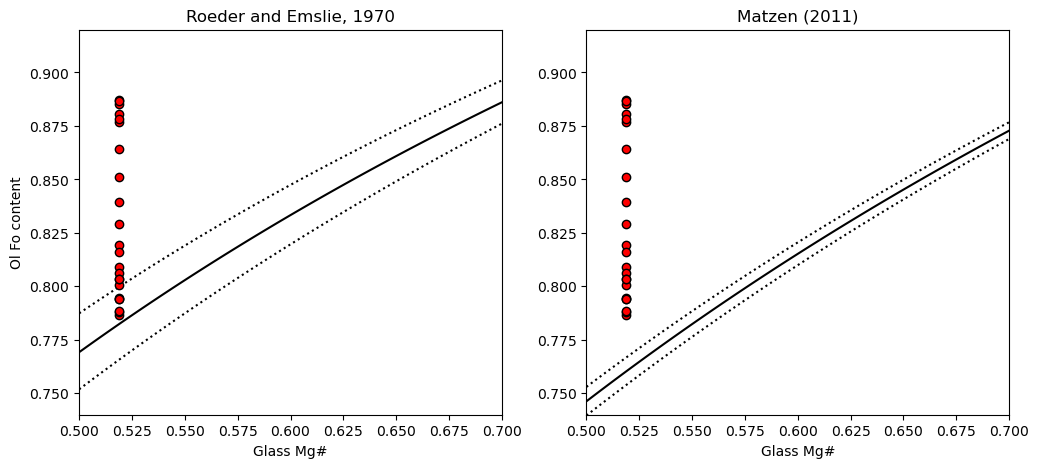

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plotting for Roeder and Emslie
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data
ax1.plot(Ol_Fo_Calc*0+Liq_Mgno_calc_mean, Ol_Fo_Calc, 'ok', mfc='red')

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(Ol_Fo_Calc*0+Liq_Mgno_calc_mean, Ol_Fo_Calc, 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Glass Mg#')
ax2.set_xlabel('Glass Mg#')
ax1.set_ylim([0.74, 0.92])
ax2.set_ylim([0.74, 0.92])
ax1.set_xlim([0.5, 0.7])
ax2.set_xlim([0.5, 0.7])

- We can see that a lot of the olivines are way to primitive to be in equilibrium with the co-erupted liquid, regardless of what Kd model we use. This is the first sign that the olivines have undergone extensive post-entrapment cooling and crystallization. 

## Workflow 2: Assess if the olivines and their melt inclusions are in equilibrium
 - If post entrapment crystallization occurs, then the crystals erupt immediatly, the melt inclusion and host olivine will be out of Mg-Fe equilibirum.
-However, as Danysuhevsky et al. show in a series of papers if sufficient time passes between the cooling event driving PEC and eruption, Fe-Mg will re-equilbrate, Fe will be lost from the inclusion, and the melt inclusion will re-approach equilibrium with its host olivine

## 1. Calculate melt inclusion Mg#

In [9]:
MI_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MIs_Liqs, Fe3Fet_Liq=0.15)
MI_Mgno_calc.head()
# Calculate mean value to plot
MI_Mgno_calc_mean=np.mean(MI_Mgno_calc)

## 2. Plot on a rhodes diagram

(0.5, 0.7)

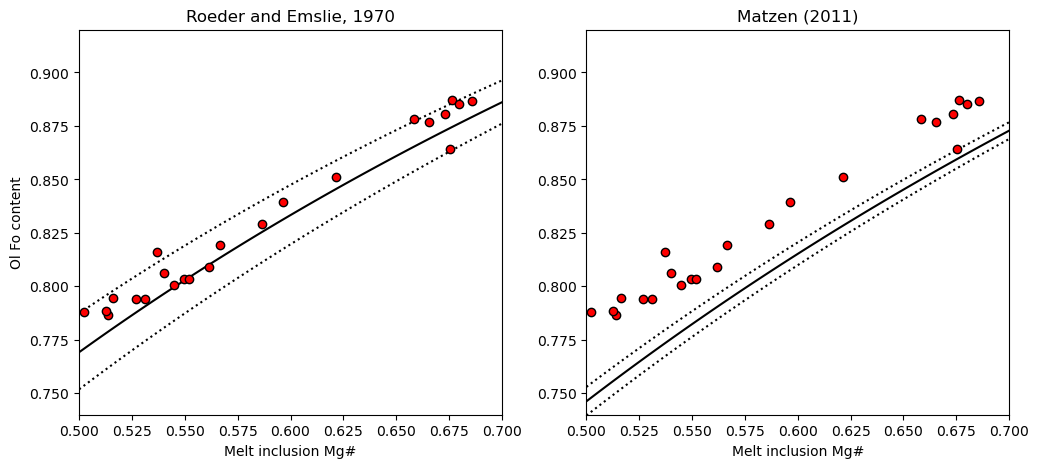

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plotting for Roeder and Emslie
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data
ax1.plot(MI_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(MI_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Melt inclusion Mg#')
ax2.set_xlabel('Melt inclusion Mg#')
ax1.set_ylim([0.74, 0.92])
ax2.set_ylim([0.74, 0.92])
ax1.set_xlim([0.5, 0.7])
ax2.set_xlim([0.5, 0.7])

- We can see using the Roeder and Emslie model, the melt inclusions are perfectly in line with the equilibrium field. Combined with the extensive olivine-matrix glass Fe-Mg disequilibrium, this shows extensive PEC, followed by diffusive re-equilibration

- Another line of evidence comes from plotting matrix glass and melt inclusoins in MgO-FeO space, its clear MI have lost abundant Fe

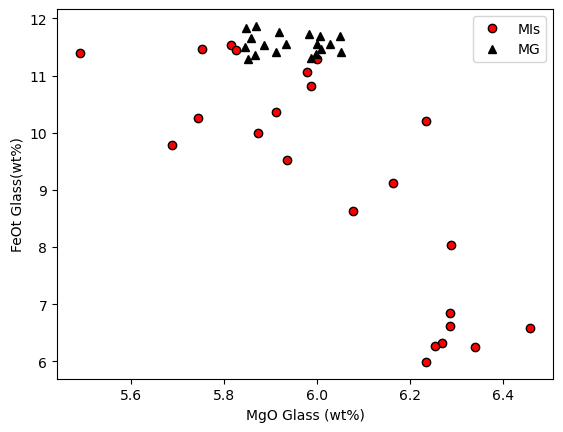

In [11]:
plt.plot(MIs_Liqs['MgO_Liq'], MIs_Liqs['FeOt_Liq'], 'ok', mfc='red', label='MIs')
plt.plot(MG_Liqs['MgO_Liq'], MG_Liqs['FeOt_Liq'], '^k', mfc='k', label='MG')
plt.xlabel('MgO Glass (wt%)')
plt.ylabel('FeOt Glass(wt%)')
plt.legend()